# Représenter les trajectoires:

In [2]:
import numpy as np
import matplotlib.pyplot as plt  
from scipy.integrate import odeint

# Dans le cas $C_1 = 1$, donc $u(t)= -1$

Par exemple, si $c_1 = 1$, on a $u(t)=-1$.\newline
En injectant dans le système de contrôle on a $(x,y)$ solution de:

$$
\left\{
\begin{array}{ll}
x'(t) = -y(t)+1 \\
y'(t) = y(t)+1
\end{array}
\right.
$$

On déduit directement que:
$$
\left\{
\begin{array}{ll}
x(t)= -y_1e^t  + 2t+ x_1 \\
y(t)=y_1e^t-1
\end{array}
\right.
$$
Avec:
$$
\left\{
\begin{array}{ll}
x_1= x(0)+y(0) +1 \\
y_1=y(0)+1
\end{array}
\right.
$$

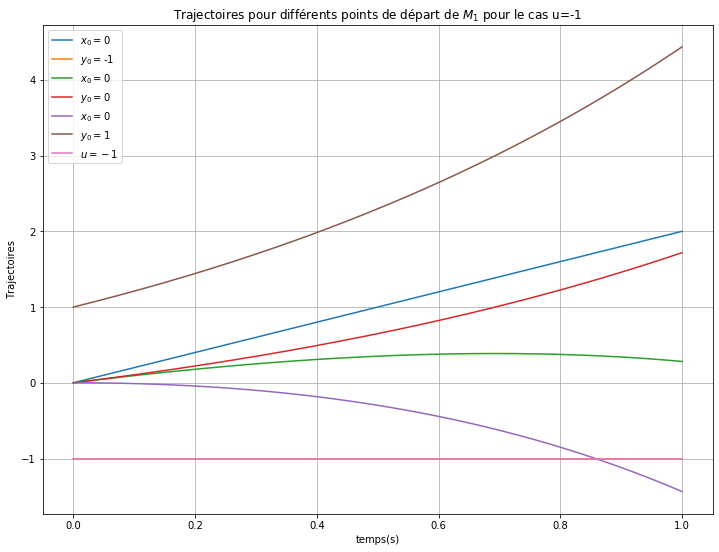

In [3]:
nt=501
T = 1
u = -1*np.ones(nt)
x0 = 0
y = [-1,0,1]

fig, ax = plt.subplots(figsize=(12,9))
ax.set(xlabel='temps(s)', ylabel='Trajectoires', \
       title= 'Trajectoires pour différents points de départ de $M_1$ pour le cas u=-1')
tm = np.linspace(0,T,nt)
for i,j in enumerate(y) :
    y0 = j
    y_t = (y0+1)*np.exp(tm) -1
    x_t = -(y0+1)*np.exp(tm)  + 2*tm + x0 +y0 +1
    
    ax.plot(tm,x_t,label=r'$x_0 = $' +str(x0))
    ax.plot(tm,y_t,label=r'$y_0 = $'+ str(y0))
    ax.grid(True)
ax.plot(tm,u,label=r'$u=-1$')
ax.legend(loc='best');

# Etude d'un cas:

Afin de vérifier une des solution obtenue en dessus, on prend un points à partir des trajectoires inverse obtenue. pour ce, on trace dans le même graphe de cas de figure du control $u$ pour la cible $(0,1)$.

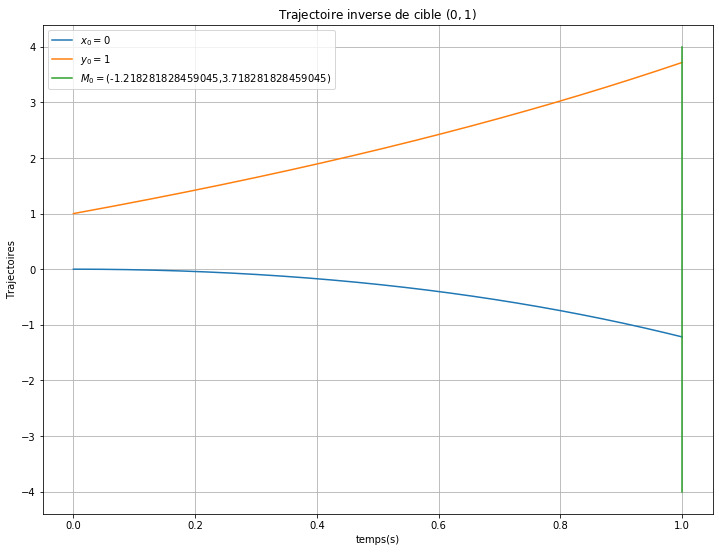

In [27]:
nt=501
T = 1

fig, ax = plt.subplots(figsize=(12,9))
ax.set(xlabel='temps(s)', ylabel='Trajectoires', \
        title= 'Trajectoire inverse de cible $(0,1)$')
tm = np.linspace(0,T,nt)
#cas u = 1
u = 1*np.ones(nt)
x0 = 0
y0 = 1 
y_t = (y0)*np.exp(tm) + tm
x_t = -(y0)*np.exp(tm) - tm**2/2 +tm + x0 +y0

#M_0
x_inv,y_inv = x_t[-1],y_t[-1]
T_inv = tm[-1]

ax.plot(tm,x_t,label=r'$x_0 = $' +str(x0))
ax.plot(tm,y_t,label=r'$y_0 = $'+ str(y0))
ax.plot(T_inv *np.ones(10),np.linspace(-4,4,10),label=r'$M_0 = $('+ str(x_inv)+","+str(y_inv)+")")
ax.grid(True)
#ax.plot(tm,u,label=r'$u=1$')
ax.legend(loc='best');

In [18]:
print("on considère ce point de dépard: \n",x_inv, y_inv,\
      "\n Pour vérifier la cible $M_1$: ("\
      ,x0,y0 ,")\n Qui correspond à un temps optimal de: ",\
      T_inv,"\n En utilisant GEKKO cidessous: \n")

on considère ce point de dépard: 
 -1.218281828459045 3.718281828459045 
 Pour vérifier la cible $M_1$: ( 0 1 )
 Qui correspond à un temps optimal de:  1.0 
 En utilisant GEKKO cidessous: 



# Trajectoires avec GEKKO

In [22]:
from gekko import GEKKO
m = GEKKO()

Final Time:  0.98765832129
M_0 =  (-0.00039359139754,1.0003916101)


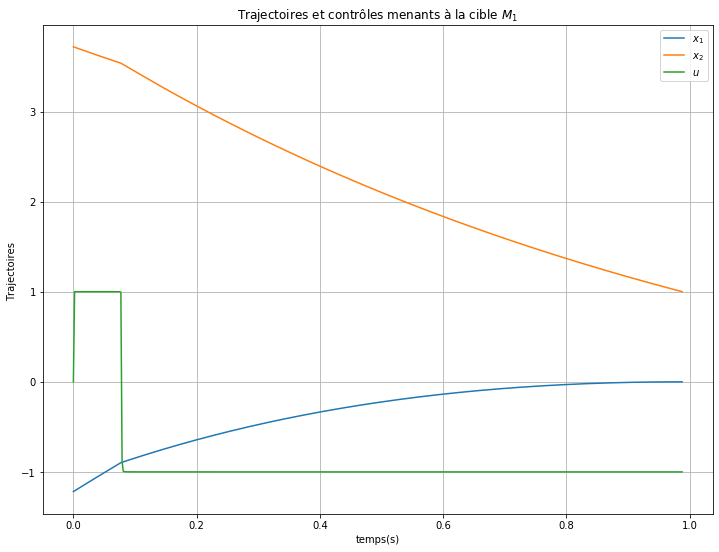

In [40]:
fig, ax = plt.subplots(figsize=(12,9))
ax.set(xlabel='temps(s)', ylabel='Trajectoires ', \
       title='Trajectoires et contrôles menants à la cible $M_1$')
m = GEKKO() # initialize GEKKO
nt = 501
penalty=1e5
penalty_t = 1
eps=0.001
m.time = np.linspace(0.1,1,nt)#changement de variable [0,T]->[0,1]

# Variables
x1 = m.Var(value=x_inv)
x2 = m.Var(value=y_inv)

p = np.zeros(nt) # final time = 1
p[-1] = 1.0
final = m.Param(value=p)
# optimize final time
tf = m.FV(value=2.0,lb=0.1,ub=20.0)
tf.STATUS = 1
# control changes every time period
u = m.MV(value=0,lb=-1,ub=1)
u.STATUS = 1
m.Equation(x1.dt()==tf*(x2+u)) #0,T]->[0,1]
m.Equation(x2.dt()==tf*(-x2+u)) #0,T]->[0,1]

m.Obj(penalty_t*tf+penalty*(x1*final)**2  +penalty*(x2*final-1+eps)**2)#+penalty*(x2*final+1)**2#+ penalty*m.max2(0,x2*final-1)**2 + penalty*m.max2(0,x2*final+1)**2)

m.options.IMODE = 6
m.solve(disp=False)
print('Final Time:  ' + str(tf.value[0]))
print('M_0 =  (' + str(x1.value[-1])+","+ str(x2.value[-1])+")")
tm = np.linspace(0,tf.value[0],nt)

ax.plot(tm,x1.value,label=r'$x_1 $')
ax.plot(tm,x2.value,label=r'$x_2 $')
ax.plot(tm,u.value,label=r'$u $')
ax.legend(loc='best')
ax.grid(True)
fig.savefig('trajectoires')